In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [27]:
dv=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
dv

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [28]:
dz=pd.DataFrame(dv)
dz

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [33]:
dz.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [35]:
dz=dz.drop('_c39',axis=1)

In [36]:
dz.shape

(1000, 39)

In [37]:

dz.replace('?', pd.NA, inplace=True)


In [48]:
dz['police_report_available'].value_counts

<bound method IndexOpsMixin.value_counts of 0       YES
1      <NA>
2        NO
3        NO
4        NO
       ... 
995    <NA>
996    <NA>
997     YES
998     YES
999    <NA>
Name: police_report_available, Length: 1000, dtype: object>

In [41]:
from sklearn.impute import SimpleImputer

In [55]:
# Assuming dz is your DataFrame and 'police_report_available' is the column with missing values
most_frequent_value = dz['police_report_available'].mode()[0]  # Calculate the most frequent value
dz['police_report_available'].fillna(most_frequent_value, inplace=True)  # Fill missing values with the most frequent value



In [56]:
dz['police_report_available'].value_counts

<bound method IndexOpsMixin.value_counts of 0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
995     NO
996     NO
997    YES
998    YES
999     NO
Name: police_report_available, Length: 1000, dtype: object>

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le=LabelEncoder()
dz['police_report_available']=le.fit_transform(dz['police_report_available'])

In [59]:
dz['police_report_available'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: police_report_available, Length: 1000, dtype: int32>

In [60]:
dz.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [61]:
dz['capital-gains'].value_counts

<bound method IndexOpsMixin.value_counts of 0      53300
1          0
2      35100
3      48900
4      66000
       ...  
995        0
996    70900
997    35100
998        0
999        0
Name: capital-gains, Length: 1000, dtype: int64>

In [62]:
dz['capital-loss'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          0
3     -62400
4     -46000
       ...  
995        0
996        0
997        0
998        0
999        0
Name: capital-loss, Length: 1000, dtype: int64>

In [64]:
dz['incident_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Single Vehicle Collision
1                 Vehicle Theft
2       Multi-vehicle Collision
3      Single Vehicle Collision
4                 Vehicle Theft
                 ...           
995    Single Vehicle Collision
996    Single Vehicle Collision
997     Multi-vehicle Collision
998    Single Vehicle Collision
999                  Parked Car
Name: incident_type, Length: 1000, dtype: object>

In [65]:
s=LabelEncoder()
dz['incident_type']=s.fit_transform(dz['incident_type'])

In [67]:
dz['incident_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      3
2      0
3      2
4      3
      ..
995    2
996    2
997    0
998    2
999    1
Name: incident_type, Length: 1000, dtype: int32>

In [68]:
dz['collision_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Side Collision
1                 <NA>
2       Rear Collision
3      Front Collision
4                 <NA>
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999               <NA>
Name: collision_type, Length: 1000, dtype: object>

In [70]:
dz.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [74]:
# Assuming dz is your DataFrame and 'police_report_available' is the column with missing values
most = dz['collision_type'].mode()[0]  # Calculate the most frequent value
dz['collision_type'].fillna(most, inplace=True)  # Fill missing values with the most frequent value



In [75]:
dz['collision_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Side Collision
1                   NO
2       Rear Collision
3      Front Collision
4                   NO
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                 NO
Name: collision_type, Length: 1000, dtype: object>

In [76]:
dz['property_damage'].value_counts

<bound method IndexOpsMixin.value_counts of 0       YES
1      <NA>
2        NO
3      <NA>
4        NO
       ... 
995     YES
996     YES
997    <NA>
998    <NA>
999    <NA>
Name: property_damage, Length: 1000, dtype: object>

In [77]:
# Assuming dz is your DataFrame and 'police_report_available' is the column with missing values
mostr = dz['property_damage'].mode()[0]  # Calculate the most frequent value
dz['property_damage'].fillna(mostr, inplace=True)  # Fill missing values with the most frequent value


In [78]:
dz['property_damage'].value_counts

<bound method IndexOpsMixin.value_counts of 0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
995    YES
996    YES
997     NO
998     NO
999     NO
Name: property_damage, Length: 1000, dtype: object>

In [79]:
re=LabelEncoder()
dz['property_damage']=re.fit_transform(dz[['property_damage']])

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
dz['property_damage'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: property_damage, Length: 1000, dtype: int32>

In [81]:
dz['incident_severity'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Major Damage
1      Minor Damage
2      Minor Damage
3      Major Damage
4      Minor Damage
           ...     
995    Minor Damage
996    Major Damage
997    Minor Damage
998    Major Damage
999    Minor Damage
Name: incident_severity, Length: 1000, dtype: object>

In [82]:
ro=LabelEncoder()
dz['incident_severity']=ro.fit_transform(dz['incident_severity'])

In [83]:
dz['incident_severity'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    1
998    0
999    1
Name: incident_severity, Length: 1000, dtype: int32>

In [86]:
dz['authorities_contacted'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Police
1      Police
2      Police
3      Police
4        None
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object>

In [88]:
dz.groupby('authorities_contacted')['authorities_contacted'].agg('count')

authorities_contacted
Ambulance    196
Fire         223
None          91
Other        198
Police       292
Name: authorities_contacted, dtype: int64

In [89]:
mo=LabelEncoder()
dz['authorities_contacted']=mo.fit_transform(dz['authorities_contacted'])

In [90]:
dz['authorities_contacted'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      4
2      4
3      4
4      2
      ..
995    1
996    1
997    4
998    3
999    4
Name: authorities_contacted, Length: 1000, dtype: int32>

In [91]:
dz.groupby('authorities_contacted')['authorities_contacted'].agg('count')

authorities_contacted
0    196
1    223
2     91
3    198
4    292
Name: authorities_contacted, dtype: int64

In [92]:
dz.groupby('incident_state')['incident_state'].agg('count')

incident_state
NC    110
NY    262
OH     23
PA     30
SC    248
VA    110
WV    217
Name: incident_state, dtype: int64

In [93]:
ur=LabelEncoder()
dz['incident_state']=ur.fit_transform(dz['incident_state'])

In [94]:
dz['incident_state'].value_counts

<bound method IndexOpsMixin.value_counts of 0      4
1      5
2      1
3      2
4      1
      ..
995    0
996    4
997    0
998    1
999    6
Name: incident_state, Length: 1000, dtype: int32>

In [95]:
vr=LabelEncoder()
dz['incident_city']=vr.fit_transform(dz['incident_city'])

In [96]:
dz['incident_city'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      5
2      1
3      0
4      0
      ..
995    4
996    3
997    0
998    0
999    1
Name: incident_city, Length: 1000, dtype: int32>

In [97]:
dz['number_of_vehicles_involved'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      3
3      1
4      1
      ..
995    1
996    1
997    3
998    1
999    1
Name: number_of_vehicles_involved, Length: 1000, dtype: int64>

In [98]:
dz['property_damage'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: property_damage, Length: 1000, dtype: int32>

In [100]:
dz['bodily_injuries'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      2
3      1
4      0
      ..
995    0
996    2
997    2
998    0
999    0
Name: bodily_injuries, Length: 1000, dtype: int64>

In [101]:
dz['witnesses'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      0
2      3
3      2
4      1
      ..
995    1
996    3
997    3
998    1
999    3
Name: witnesses, Length: 1000, dtype: int64>

In [102]:
dz['injury_claim'].value_counts

<bound method IndexOpsMixin.value_counts of 0       6510
1        780
2       7700
3       6340
4       1300
       ...  
995    17440
996    18080
997     7500
998     5220
999      460
Name: injury_claim, Length: 1000, dtype: int64>

In [104]:
tr=LabelEncoder()
dz['insured_sex']=tr.fit_transform(dz['insured_sex'])

In [105]:
dz.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [260]:
dz=dz[[   'months_as_customer', 'age', 'policy_number', #'policy_bind_date',
       'policy_state', #'policy_csl', 
        #'policy_deductable',
       'policy_annual_premium', #'umbrella_limit', 
        #'insured_zip', 
        'insured_sex',
       #'insured_education_level', 
       #'insured_occupation', #'insured_hobbies',
       #'insured_relationship', 
        #'capital-gains', 'capital-loss',
       #'incident_date',  
       #'incident_type', #'collision_type', 
       'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       #'incident_location', 'incident_hour_of_the_day',
       #'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', #'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', #'auto_make',
       #'auto_model', 'auto_year', 
      'fraud_reported']].copy()

In [106]:
vb=LabelEncoder()
dz['policy_state']=vb.fit_transform(dz['policy_state'])

In [108]:
dz['fraud_reported'].value_counts

<bound method IndexOpsMixin.value_counts of 0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object>

In [109]:
dz.groupby('fraud_reported')['fraud_reported'].agg('count')

fraud_reported
N    753
Y    247
Name: fraud_reported, dtype: int64

In [111]:
dz

,months_as_customer,age,policy_number,policy_state,policy_annual_premium,insured_sex,incident_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,521585,2,1406.91,1,2,0,4,4,1,1,1,1,2,1,6510,13020,52080,Y
1,228,42,342868,1,1197.22,1,3,1,4,5,5,1,0,0,0,0,780,780,3510,Y
2,134,29,687698,2,1413.14,0,0,1,4,1,1,3,0,2,3,0,7700,3850,23100,N
3,256,41,227811,0,1415.74,0,2,0,4,2,0,1,0,1,2,0,6340,6340,50720,Y
4,228,44,367455,0,1583.91,1,3,1,2,1,0,1,0,0,1,0,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,1310.80,0,2,1,1,0,4,1,1,0,1,0,17440,8720,61040,N
996,285,41,186934,0,1436.79,0,2,0,1,4,3,1,1,2,3,0,18080,18080,72320,N
997,130,34,918516,2,1383.49,0,0,1,4,0,0,3,0,2,3,1,7500,7500,52500,N
998,458,62,533940,0,1356.92,1,2,0,3,1,0,1,0,0,1,1,5220,5220,36540,N


In [112]:
dz.skew()

C:\Users\ganes\AppData\Local\Temp\ipykernel_6268\2123094602.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dz.skew()


months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_annual_premium          0.004402
insured_sex                    0.148630
incident_type                  0.101507
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

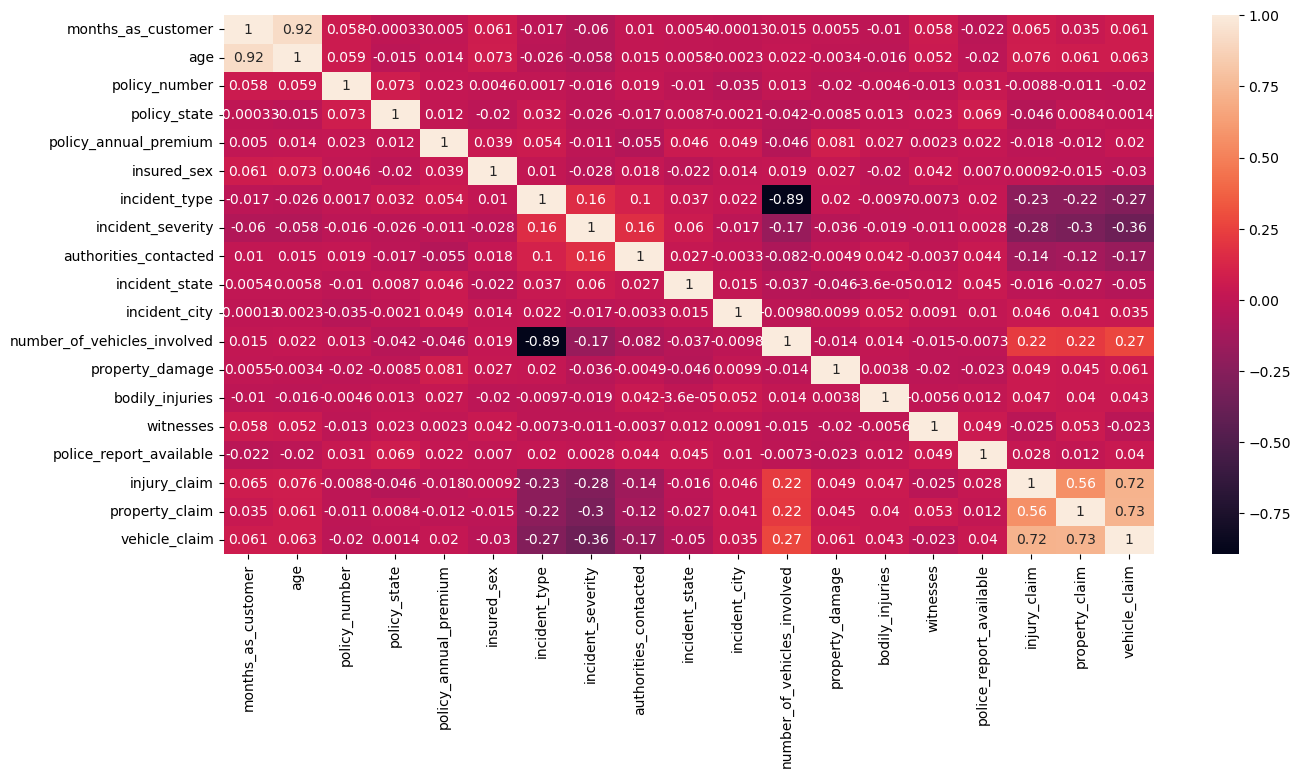

In [115]:
dz.cor=dz.corr()
plt.figure(figsize=(15,7))
sns.heatmap(dz.cor,annot=True)
plt.show()

In [116]:
dz.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_annual_premium', 'insured_sex', 'incident_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

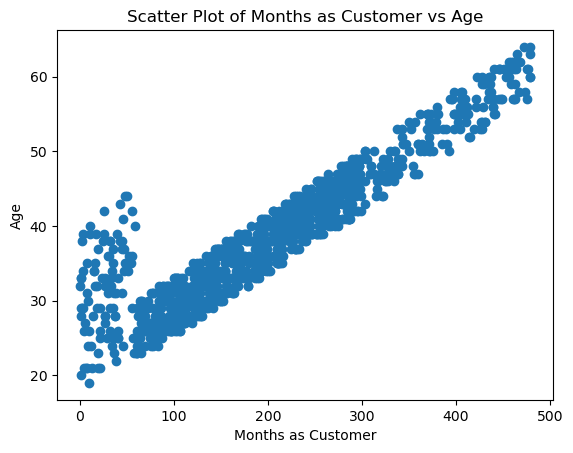

In [118]:
import matplotlib.pyplot as plt

# Assuming dz is your DataFrame
plt.scatter(dz['months_as_customer'], dz['age'])
plt.xlabel('Months as Customer')
plt.ylabel('Age')
plt.title('Scatter Plot of Months as Customer vs Age')
plt.show()


In [120]:
dz = dz.drop(['incident_type', 'number_of_vehicles_involved'], axis=1)


In [121]:
dz.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_annual_premium', 'insured_sex', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [122]:
dz.shape

(1000, 18)

months_as_customer            AxesSubplot(0.125,0.653529;0.0945122x0.226471)
age                        AxesSubplot(0.238415,0.653529;0.0945122x0.226471)
policy_number              AxesSubplot(0.351829,0.653529;0.0945122x0.226471)
policy_state               AxesSubplot(0.465244,0.653529;0.0945122x0.226471)
policy_annual_premium      AxesSubplot(0.578659,0.653529;0.0945122x0.226471)
insured_sex                AxesSubplot(0.692073,0.653529;0.0945122x0.226471)
incident_severity          AxesSubplot(0.805488,0.653529;0.0945122x0.226471)
authorities_contacted         AxesSubplot(0.125,0.381765;0.0945122x0.226471)
incident_state             AxesSubplot(0.238415,0.381765;0.0945122x0.226471)
incident_city              AxesSubplot(0.351829,0.381765;0.0945122x0.226471)
property_damage            AxesSubplot(0.465244,0.381765;0.0945122x0.226471)
bodily_injuries            AxesSubplot(0.578659,0.381765;0.0945122x0.226471)
witnesses                  AxesSubplot(0.692073,0.381765;0.0945122x0.226471)

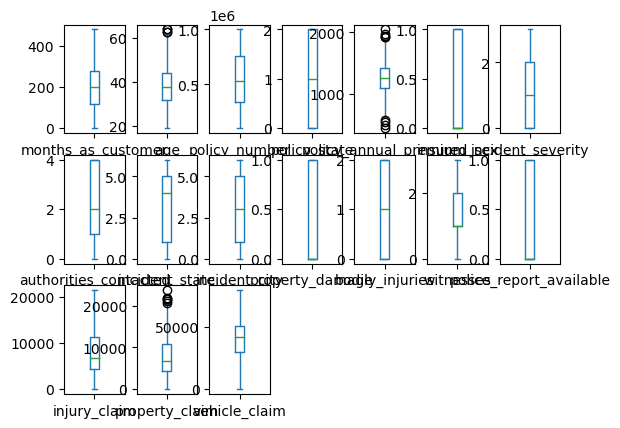

In [125]:
dz.plot(kind='box', subplots=True, layout=(3, 7))


In [126]:
from scipy.stats import zscore

In [133]:
z=np.abs(zscore(dz))
z

,months_as_customer,age,policy_number,policy_state,policy_annual_premium,insured_sex,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,1.078140,0.990836,0.095953,1.187173,0.616705,1.076953,1.260614,1.196963,0.351762,0.962196,1.520282,0.009759,0.461838,1.478078,0.189283,1.165505,0.749653,1.746019
1,0.208995,0.334073,0.791527,0.016856,0.242521,1.076953,0.195906,1.196963,0.815829,0.995476,0.657773,1.210174,1.338700,0.676554,1.363822,1.372696,1.823346,1.746019
2,0.608002,1.088913,0.550566,1.187173,0.642233,0.928546,0.195906,1.196963,1.040437,0.962196,0.657773,1.229693,1.362107,0.676554,0.054644,0.736072,0.785565,0.572731
3,0.452355,0.224613,1.239334,1.220886,0.652886,0.928546,1.260614,1.196963,0.576371,1.451614,0.657773,0.009759,0.461838,0.676554,0.224130,0.219722,0.677607,1.746019
4,0.208995,0.552994,0.695834,1.220886,1.341980,1.076953,0.195906,0.109052,1.040437,1.451614,0.657773,1.210174,0.438431,0.676554,1.257232,1.399654,1.768252,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.539740,1.187173,0.222884,0.928546,0.195906,0.762060,1.504504,0.506058,1.520282,1.210174,0.438431,0.676554,2.051155,0.273817,1.224309,0.572731
996,0.704407,0.224613,1.398429,1.220886,0.739141,0.928546,1.260614,0.762060,0.351762,0.016640,1.520282,1.229693,1.362107,0.676554,2.182342,2.214794,1.821868,0.572731
997,0.642767,0.541611,1.448920,1.187173,0.520739,0.928546,0.195906,1.196963,1.504504,1.451614,0.657773,1.229693,1.362107,1.478078,0.013648,0.020826,0.771902,0.572731
998,2.208028,2.523284,0.047867,1.220886,0.411866,1.076953,1.260614,0.543955,1.040437,1.451614,0.657773,1.210174,0.438431,1.478078,0.453708,0.451976,0.073580,0.572731


In [129]:
dz.dtypes

months_as_customer           int64
age                          int64
policy_number                int64
policy_state                 int32
policy_annual_premium      float64
insured_sex                  int32
incident_severity            int32
authorities_contacted        int32
incident_state               int32
incident_city                int32
property_damage              int32
bodily_injuries              int64
witnesses                    int64
police_report_available      int32
injury_claim                 int64
property_claim               int64
vehicle_claim                int64
fraud_reported              object
dtype: object

In [130]:
rt=LabelEncoder()
dz['fraud_reported']=rt.fit_transform(dz['fraud_reported'])

In [131]:
dz.dtypes

months_as_customer           int64
age                          int64
policy_number                int64
policy_state                 int32
policy_annual_premium      float64
insured_sex                  int32
incident_severity            int32
authorities_contacted        int32
incident_state               int32
incident_city                int32
property_damage              int32
bodily_injuries              int64
witnesses                    int64
police_report_available      int32
injury_claim                 int64
property_claim               int64
vehicle_claim                int64
fraud_reported               int32
dtype: object

In [134]:
threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763], dtype=int64), array([ 4,  4, 15,  4], dtype=int64))


In [136]:
dz_new=dz[(z<3).all (axis=1)]

In [137]:
dz_new.shape

(996, 18)

In [138]:
dz=dz_new

In [139]:
dz.shape

(996, 18)

In [142]:
dz['fraud_reported'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 996, dtype: int32>

In [143]:
dz.groupby('fraud_reported')['fraud_reported'].agg('count')

fraud_reported
0    750
1    246
Name: fraud_reported, dtype: int64

In [145]:
x=dz.iloc[:,0:-1]
y=dz.iloc[:,-1]

In [144]:
from imblearn.over_sampling import SMOTE

In [146]:
smt=SMOTE()

In [147]:
x_sample,y_sample=smt.fit_resample(x,y)

In [150]:
y_sample.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler=StandardScaler()

In [153]:
x_sample=scaler.fit_transform(x_sample)
x_sample

array([[ 1.12768274,  1.06143822, -0.09815419, ..., -0.26689369,
         1.16373102,  0.70652744],
       [ 0.21535743,  0.37663937, -0.7937941 , ..., -1.53106563,
        -1.56183427, -2.14483556],
       [-0.64222836, -1.10709148,  0.54842577, ..., -0.00435187,
        -0.87821618, -0.99477994],
       ...,
       [ 1.07294322,  1.2897045 , -1.67210482, ...,  0.88387784,
        -0.42996757,  0.38740022],
       [ 0.68976659,  0.49077251, -1.67277432, ...,  0.17038184,
         1.24656682,  1.5034062 ],
       [ 2.42318468,  2.6593022 ,  1.18887909, ..., -1.45009685,
        -1.5807618 , -2.06517116]])

In [154]:
x_sample.shape

(1500, 17)

In [158]:
x_sample.data

In [162]:
dtc=DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score

In [163]:
cross_score=cross_val_score(dtc,x_sample,y_sample,cv=5)
print(cross_score)
print(cross_score.mean())
print(cross_score.std())

[0.61666667 0.74333333 0.77333333 0.8        0.79333333]
0.7453333333333334
0.06728381017088071


In [164]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=.30,random_state=42)

In [165]:
x_train.shape

(1050, 17)

In [166]:
x_test.shape

(450, 17)

In [167]:
y_train.shape

(1050,)

In [168]:
y_test.shape

(450,)

In [169]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [170]:
predlg=lg.predict(x_test)
predlg

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [171]:
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.7955555555555556
[[161  45]
 [ 47 197]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       206
           1       0.81      0.81      0.81       244

    accuracy                           0.80       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.80      0.80      0.80       450



In [172]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [173]:
pred_dtc=dtc.predict(x_test)
pred_dtc

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [174]:
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.7688888888888888
[[155  51]
 [ 53 191]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       206
           1       0.79      0.78      0.79       244

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450



In [176]:
from sklearn.neighbors import KNeighborsClassifier

In [177]:
knn=KNeighborsClassifier()

In [178]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [179]:
knn_pred=knn.predict(x_test)
knn_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [180]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.76
[[133  73]
 [ 35 209]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       206
           1       0.74      0.86      0.79       244

    accuracy                           0.76       450
   macro avg       0.77      0.75      0.75       450
weighted avg       0.76      0.76      0.76       450



In [181]:
svc_poly=SVC(kernel='poly')
svc_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [182]:
pred_svc_poly=svc_poly.predict(x_test)
pred_svc_poly

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [183]:
print(accuracy_score(y_test,pred_svc_poly))
print(confusion_matrix(y_test,pred_svc_poly))
print(classification_report(y_test,pred_svc_poly))

0.78
[[142  64]
 [ 35 209]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       206
           1       0.77      0.86      0.81       244

    accuracy                           0.78       450
   macro avg       0.78      0.77      0.78       450
weighted avg       0.78      0.78      0.78       450



In [184]:
svc_linear=SVC(kernel='linear')
svc_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [185]:
predsvc_linear=svc_linear.predict(x_test)
predsvc_linear

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [187]:
print(accuracy_score(y_test,predsvc_linear))
print(confusion_matrix(y_test,predsvc_linear))
print(classification_report(y_test,predsvc_linear))

0.7888888888888889
[[172  34]
 [ 61 183]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       206
           1       0.84      0.75      0.79       244

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.80      0.79      0.79       450



In [188]:
svc=SVC()
svc.fit(x_train,y_train)


SVC()

In [189]:
pred_svc=svc.predict(x_test)
pred_svc

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [190]:
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8177777777777778
[[168  38]
 [ 44 200]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       206
           1       0.84      0.82      0.83       244

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.82      0.82      0.82       450



In [209]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfc=RandomForestClassifier(n_estimators=1000)

In [204]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [205]:
pred_rfc=rfc.predict(x_test)
pred_rfc

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [206]:
print(accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

0.8355555555555556
[[173  33]
 [ 41 203]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       206
           1       0.86      0.83      0.85       244

    accuracy                           0.84       450
   macro avg       0.83      0.84      0.83       450
weighted avg       0.84      0.84      0.84       450



In [211]:
from sklearn.ensemble import ExtraTreesClassifier

In [213]:
etc=ExtraTreesClassifier()

In [214]:
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [215]:
etc_pred=etc.predict(x_test)
etc_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [216]:
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

0.8333333333333334
[[175  31]
 [ 44 200]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       206
           1       0.87      0.82      0.84       244

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.84      0.83      0.83       450



In [217]:
from sklearn.ensemble import AdaBoostClassifier


In [230]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

C:\Users\ganes\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [232]:
ada_pred=ada.predict(x_test)
ada_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [233]:
print(accuracy_score(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))

0.7911111111111111
[[166  40]
 [ 54 190]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       206
           1       0.83      0.78      0.80       244

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



In [240]:
from sklearn.ensemble import GradientBoostingClassifier

In [244]:
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [245]:
pred_gbc=gbc.predict(x_test)
pred_gbc

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [246]:
print(accuracy_score(y_test,pred_gbc))
print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))

0.8244444444444444
[[174  32]
 [ 47 197]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       206
           1       0.86      0.81      0.83       244

    accuracy                           0.82       450
   macro avg       0.82      0.83      0.82       450
weighted avg       0.83      0.82      0.82       450



In [247]:
dz

,months_as_customer,age,policy_number,policy_state,policy_annual_premium,insured_sex,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,521585,2,1406.91,1,0,4,4,1,1,1,2,1,6510,13020,52080,1
1,228,42,342868,1,1197.22,1,1,4,5,5,0,0,0,0,780,780,3510,1
2,134,29,687698,2,1413.14,0,1,4,1,1,0,2,3,0,7700,3850,23100,0
3,256,41,227811,0,1415.74,0,0,4,2,0,0,1,2,0,6340,6340,50720,1
4,228,44,367455,0,1583.91,1,1,2,1,0,0,0,1,0,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,1310.80,0,1,1,0,4,1,0,1,0,17440,8720,61040,0
996,285,41,186934,0,1436.79,0,0,1,4,3,1,2,3,0,18080,18080,72320,0
997,130,34,918516,2,1383.49,0,1,4,0,0,0,2,3,1,7500,7500,52500,0
998,458,62,533940,0,1356.92,1,0,3,1,0,0,0,1,1,5220,5220,36540,0


In [252]:
def rfctest(d):
    d=d.reshape(1,-1)
    bg=rfc.predict(d)
    print(bg)
    if bg==0:
        print('No Fraud_reported')
    elif bg==1:
        print('Fraud_reported')
d=np.array([324,50,512342,0,1234.0,0,0,2,4,1,5,1,2,3,450,450,52080])
rfctest(d)

[0]
No Fraud_reported


In [253]:
dl=pd.DataFrame(pred_rfc)
dl.to_csv('automobilefraud_rfc_submission.csv')

In [254]:
import joblib

In [255]:
joblib.dump(rfc,'rfcmodel.obj')
rfc_to_joblib=joblib.load('rfcmodel.obj')
rfc_to_joblib.predict(x_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,